In [3]:
# Lab 2: Complex State Analyzer
# Code Examples for the Applied Quantum Computing course
# These examples are created to build your foundation on programming skills
# and recall your memory on your linear algebra concepts and how to program them.

In [4]:
# Corrected Installation on Google Colab for Qiskit latest version (as of 2026)
!pip install qiskit qiskit-aer matplotlib pylatexenc --quiet


zsh:1: command not found: pip


In [5]:
# Cell 1: Corrected Installation (Standard for 2026)
!pip install qiskit qiskit-aer matplotlib pylatexenc --quiet

print("Setup Complete! All visualization engines ready.")

zsh:1: command not found: pip
Setup Complete! All visualization engines ready.


In [6]:
import numpy as np


In [7]:
# Orthogonality Test
# Let's define the standard computational basis states
state_0 = np.array([1, 0])
state_1 = np.array([0, 1])

# Calculate the overlap (Inner Product)
overlap = np.vdot(state_0, state_1)

print(f"Inner Product of |0> and |1>: {overlap}")

if np.isclose(overlap, 0.0):
    print("Result: These states are ORTHOGONAL (90 degrees apart).")
else:
    print(f"Result: These states have an overlap of {overlap}.")

# --- STUDENT CHALLENGE ---
# Try testing state_0 against the plus state: [1/np.sqrt(2), 1/np.sqrt(2)]
# Are they orthogonal?

Inner Product of |0> and |1>: 0
Result: These states are ORTHOGONAL (90 degrees apart).


The Mathematical MismatchThe dot product and the inner product only agree if the entries of the vectors are exclusively real numbers. In quantum mechanics, we use the inner product because it generalizes the operation to include complex entries. This ensures that the length (norm) of a quantum state is always a positive real number.Dot Product ($u \cdot v$): Sum of $u_i v_i$.Inner Product ($\langle u, v \rangle$): Sum of $\overline{u}_i v_i$ (where $\overline{u}$ is the complex conjugate).

In [8]:
# updated code

# Dot Product vs. Inner Product Mismatch
import numpy as np

# Define a complex vector (Ket)
u = np.array([2 - 3j, 6 + 4j])
v = np.array([1 + 1j, 2 - 2j])

# 1. Standard Dot Product (Does NOT conjugate)
dot_prod = np.dot(u, v)

# 2. Complex Inner Product (Conjugates the first vector)
# This is equivalent to <u|v> in Bra-Ket notation
inner_prod = np.vdot(u, v)

print(f"Vector u: {u}")
print(f"Vector v: {v}")
print("-" * 30)
print(f"Standard Dot Product: {dot_prod}")
print(f"Complex Inner Product: {inner_prod}")

# Explanation for Students
if dot_prod != inner_prod:
    print("\nOBSERVATION: Pay attention that the results are DIFFERENT.")
    print("In Quantum Computing, we MUST use the Inner Product (np.vdot).")

Vector u: [2.-3.j 6.+4.j]
Vector v: [1.+1.j 2.-2.j]
------------------------------
Standard Dot Product: (25-5j)
Complex Inner Product: (3-15j)

OBSERVATION: Pay attention that the results are DIFFERENT.
In Quantum Computing, we MUST use the Inner Product (np.vdot).


In [9]:
# Testing the textbook example
# ket_a = [2-3j, 6-3j]
ket_a = np.array([2-3j, 6-3j])

# Standard Dot Product (Incorrect for Quantum)
incorrect_norm_sq = np.dot(ket_a, ket_a)

# Inner Product (Correct: <a|a>)
correct_norm_sq = np.vdot(ket_a, ket_a)

print(f"Incorrect Dot Product result: {incorrect_norm_sq}")
print(f"Correct Inner Product result: {correct_norm_sq.real}")
print("\nNotice that only the Inner Product gives us a real number!")

Incorrect Dot Product result: (22-48j)
Correct Inner Product result: 58.0

Notice that only the Inner Product gives us a real number!


In [10]:
#
import numpy as np

a = np.array([1+2j, 3+4j])
b = np.array([5+6j, 7+8j])

# np.vdot: conjugates the first argument (a)
# (1-2j)*(5+6j) + (3-4j)*(7+8j) = (17-4j) + (53-4j) = 70-8j
print(np.vdot(a, b)) # Output: (70-8j)

# np.dot: straightforward multiplication
# (1+2j)*(5+6j) + (3+4j)*(7+8j) = (-7+16j) + (-11+52j) = -18+68j
print(np.dot(a, b))  # Output: (-18+68j)


(70-8j)
(-18+68j)


Polar Coordinates

z = 1 + i: Vector = (1.0, 1.0), Length (Norm) = 1.4142
z = -i: Vector = (-0.0, -1.0), Length (Norm) = 1.0000
z = Plus State: Vector = (0.7071067811865475, 0.7071067811865475), Length (Norm) = 1.0000


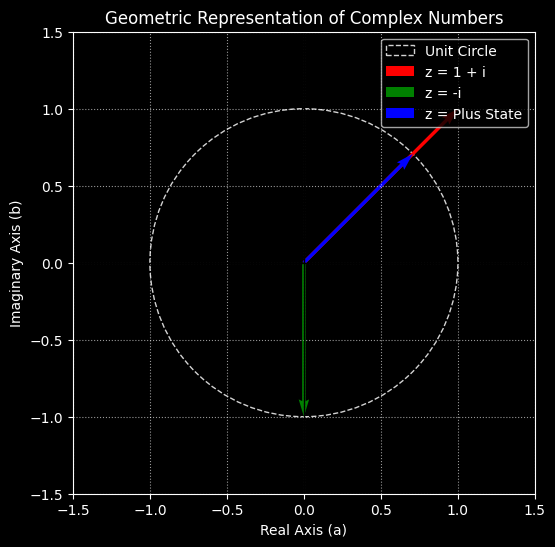

In [11]:
# Lab 2 Supplement: Geometric Visualization
import numpy as np
import matplotlib.pyplot as plt

def plot_complex_vectors(complex_numbers, labels):
    # Set up the plot
    fig, ax = plt.subplots(figsize=(6, 6))

    # Draw the Unit Circle (Radius = 1)
    # This represents the set of all possible normalized quantum states
    circle = plt.Circle((0, 0), 1, color='lightgray', fill=False, linestyle='--', label='Unit Circle')
    ax.add_artist(circle)

    # Plot each complex number as a vector
    colors = ['r', 'g', 'b', 'm']
    for i, z in enumerate(complex_numbers):
        # A complex number z = a + bi is treated as vector (a, b)
        a, b = z.real, z.imag
        ax.quiver(0, 0, a, b, angles='xy', scale_units='xy', scale=1, color=colors[i % len(colors)], label=labels[i])

        # Calculate the L2-norm (length) using the inner product logic
        norm = np.sqrt(np.vdot(z, z).real)
        print(f"{labels[i]}: Vector = ({a}, {b}), Length (Norm) = {norm:.4f}")

    # Plot formatting
    limit = 1.5
    ax.set_xlim(-limit, limit)
    ax.set_ylim(-limit, limit)
    ax.axhline(0, color='black', linewidth=1)
    ax.axvline(0, color='black', linewidth=1)
    ax.set_xlabel('Real Axis (a)')
    ax.set_ylabel('Imaginary Axis (b)')
    ax.set_title('Geometric Representation of Complex Numbers')
    ax.legend()
    ax.grid(True, linestyle=':', alpha=0.6)
    ax.set_aspect('equal')
    plt.show()

# --- Exercise Data ---
# 1. z = 1 + i (Not normalized)
# 2. z = -i (Normalized)
# 3. z = 1/sqrt(2) + i/sqrt(2) (Standard Quantum State)
z_list = [1 + 1j, -1j, (1/np.sqrt(2)) + (1/np.sqrt(2))*1j]
label_list = ["z = 1 + i", "z = -i", "z = Plus State"]

plot_complex_vectors(z_list, label_list)

Vizulizations...

--- Analysis for z = 0.6 + 0.8i ---
Vector Form:  [0.6, 0.8]
L2-Norm:      1.0000
Phase Angle:  53.13 degrees
Normalized?   YES


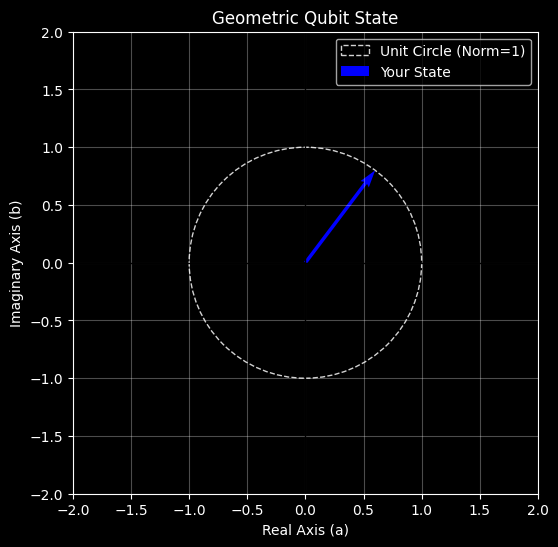

In [12]:
# Lab 2: Complex State Analyzer
import numpy as np
import matplotlib.pyplot as plt

def analyze_qubit_state(a, b):
    # 1. Create the complex number
    z = complex(a, b)

    # 2. Calculate the L2-norm (Length) using the inner product logic
    # From Definition 11.56: <z,z> = a^2 + b^2
    norm_sq = np.vdot(z, z).real
    length = np.sqrt(norm_sq)

    # 3. Calculate the angle theta in degrees
    # From Eq 11.60: tan(theta) = b/a
    angle_rad = np.arctan2(b, a)
    angle_deg = np.degrees(angle_rad)

    print(f"--- Analysis for z = {a} + {b}i ---")
    print(f"Vector Form:  [{a}, {b}]")
    print(f"L2-Norm:      {length:.4f}")
    print(f"Phase Angle:  {angle_deg:.2f} degrees")
    print(f"Normalized?   {'YES' if np.isclose(length, 1.0) else 'NO'}")

    # Plotting
    fig, ax = plt.subplots(figsize=(6,6))
    circle = plt.Circle((0, 0), 1, color='lightgray', fill=False, linestyle='--', label='Unit Circle (Norm=1)')
    ax.add_artist(circle)

    ax.quiver(0, 0, a, b, angles='xy', scale_units='xy', scale=1, color='blue', label='Your State')

    ax.set_xlim(-2, 2); ax.set_ylim(-2, 2)
    ax.axhline(0, color='black', lw=1); ax.axvline(0, color='black', lw=1)
    ax.set_xlabel('Real Axis (a)'); ax.set_ylabel('Imaginary Axis (b)')
    ax.set_title('Geometric Qubit State')
    ax.legend(); ax.grid(True, alpha=0.3)
    plt.show()

# --- STUDENT INPUT ---
# Try a = 0.6, b = 0.8 to see a normalized state!
analyze_qubit_state(a=0.6, b=0.8)

Dimensional Bridge.

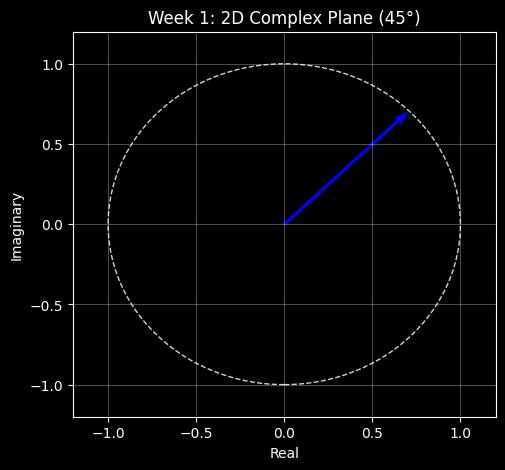

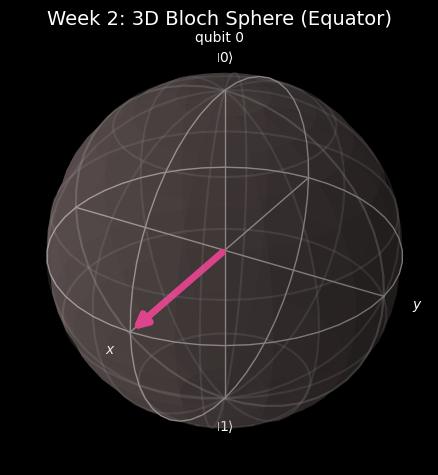

In [13]:
# Lab 1: Corrected Side-by-Side Visualization
from qiskit.visualization import plot_bloch_multivector
from qiskit.quantum_info import Statevector
import matplotlib.pyplot as plt
import numpy as np

# 1. Prepare the state (The Plus State: 45 degrees in 2D)
coords = [1/np.sqrt(2), 1/np.sqrt(2)]
state = Statevector(coords)

# 2. Setup the figure
fig = plt.figure(figsize=(12, 5))

# 3. Left Side: The 2D Complex Plane (Your math from Section 11.3)
ax1 = fig.add_subplot(121)
circle = plt.Circle((0, 0), 1, color='lightgray', fill=False, linestyle='--')
ax1.add_artist(circle)
ax1.quiver(0, 0, coords[0], coords[1], angles='xy', scale_units='xy', scale=1, color='blue', label="State Vector")
ax1.set_xlim(-1.2, 1.2); ax1.set_ylim(-1.2, 1.2)
ax1.set_title("Week 1: 2D Complex Plane (45°)")
ax1.set_xlabel("Real"); ax1.set_ylabel("Imaginary")
ax1.grid(True, alpha=0.3)

# 4. Right Side: The 3D Bloch Sphere
# We remove 'ax=ax2' and let the function return a figure object
bloch_fig = plot_bloch_multivector(state)
bloch_fig.suptitle("Week 2: 3D Bloch Sphere (Equator)", fontsize=14)

plt.show()

Interactive  Rotation Simulation

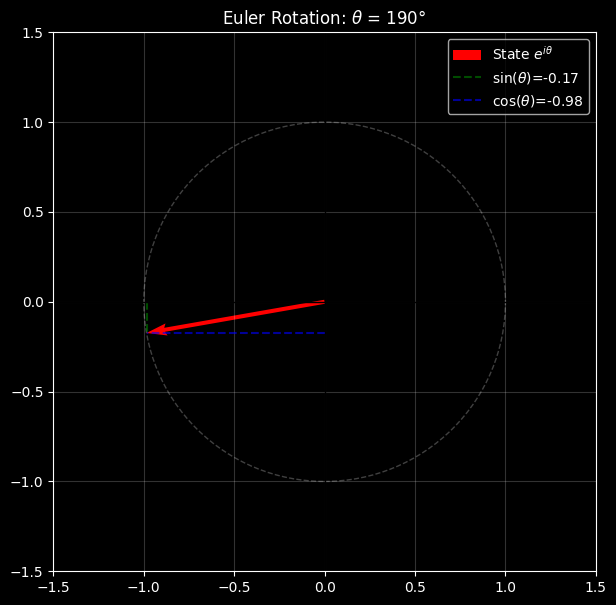

In [14]:
# Euler Rotation Simulator
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.widgets import Slider

# We use a static plot for Colab, but you can run this
# locally for a live-sliding experience.
def plot_rotation(theta_degrees):
    # 1. Convert degrees to radians
    theta_rad = np.radians(theta_degrees)

    # 2. Apply Euler's Formula: z = e^(i*theta)
    # This is the "Transformation" mentioned in the text
    z = np.exp(1j * theta_rad)

    # 3. Extract components for plotting
    a = z.real # cos(theta)
    b = z.imag # sin(theta)

    fig, ax = plt.subplots(figsize=(7, 7))

    # Draw the Unit Circle (Norm = 1)
    circle = plt.Circle((0, 0), 1, color='gray', fill=False, linestyle='--', alpha=0.5)
    ax.add_artist(circle)

    # Draw the rotating vector
    ax.quiver(0, 0, a, b, angles='xy', scale_units='xy', scale=1, color='red', label=f'State $e^{{i\\theta}}$')

    # Draw the projection lines to show cos and sin
    ax.plot([a, a], [0, b], 'g--', alpha=0.6, label=f'sin($\\theta$)={b:.2f}')
    ax.plot([0, a], [b, b], 'b--', alpha=0.6, label=f'cos($\\theta$)={a:.2f}')

    # Formatting
    ax.set_xlim(-1.5, 1.5)
    ax.set_ylim(-1.5, 1.5)
    ax.axhline(0, color='black', lw=1)
    ax.axvline(0, color='black', lw=1)
    ax.set_title(f"Euler Rotation: $\\theta$ = {theta_degrees}°")
    ax.legend(loc='upper right')
    ax.grid(True, alpha=0.2)
    plt.show()

# Change this value to rotate the vector!
plot_rotation(theta_degrees=190)

Matix operators

Matrix Rotation Simulator is designed for your next lab to bridge the gap between abstract matrix-vector multiplication and the physical "tilting" of space described in your textbook.

By using standard quantum gates like the Pauli-X (NOT) or the Hadamard (H), students can visualize how these grids of numbers act as physical instructions to rotate or flip a qubit state.

Google Colab: Matrix Transformation Simulator
Copy this code into a new cell. It allows students to apply a matrix to a starting vector and see the "Before" and "After" on a coordinate plane.

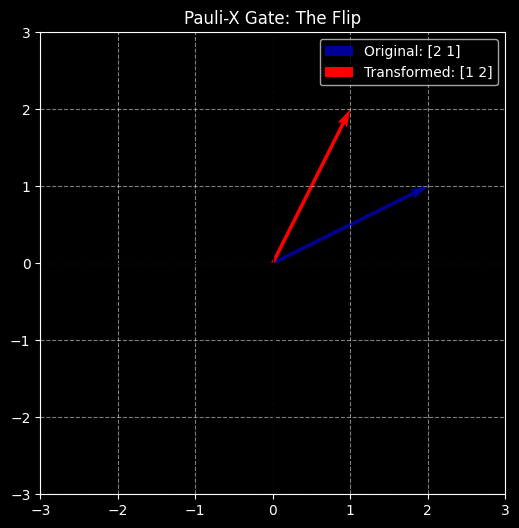

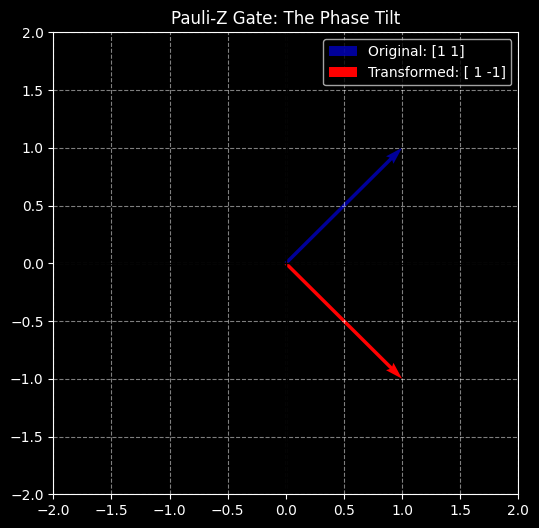

In [15]:
import numpy as np
import matplotlib.pyplot as plt

def simulate_transformation(matrix, vector, title="Matrix Transformation"):
    # Calculate the transformed vector (Matrix-Vector Multiplication)
    # Using the rule: [a, b; c, d] * [e; f] = [ae + bf; ce + df]
    transformed_vector = np.dot(matrix, vector)

    # Setup the plot
    plt.figure(figsize=(6, 6))
    plt.axhline(0, color='black', lw=1)
    plt.axvline(0, color='black', lw=1)

    # Plot Original Vector (Blue)
    plt.quiver(0, 0, vector[0], vector[1], angles='xy', scale_units='xy', scale=1,
               color='blue', label=f'Original: {vector}', alpha=0.6)

    # Plot Transformed Vector (Red)
    plt.quiver(0, 0, transformed_vector[0], transformed_vector[1], angles='xy',
               scale_units='xy', scale=1, color='red', label=f'Transformed: {transformed_vector}')

    # Formatting the "Space"
    limit = max(np.abs(np.concatenate([vector, transformed_vector]))) + 1
    plt.xlim(-limit, limit)
    plt.ylim(-limit, limit)
    plt.grid(True, linestyle='--', alpha=0.5)
    plt.legend()
    plt.title(title)
    plt.show()

# --- LAB EXERCISES ---

# 1. The Pauli-X (NOT) Gate: Flips coordinates (x,y) -> (y,x)
X = np.array([[0, 1],
              [1, 0]])
v1 = np.array([2, 1])
simulate_transformation(X, v1, "Pauli-X Gate: The Flip")

# 2. The Pauli-Z Gate: Flips the phase (positive to negative)
Z = np.array([[1, 0],
              [0, -1]])
v2 = np.array([1, 1])
simulate_transformation(Z, v2, "Pauli-Z Gate: The Phase Tilt")

In [16]:
print("Hello Applied QC World...! Now my Qiskit and other installations are completed! Ready for Lab 1.")

Hello Applied QC World...! Now my Qiskit and other installations are completed! Ready for Lab 1.


In [17]:
from qiskit.visualization import plot_bloch_multivector
# print("Visualization module loaded successfully!")

In [18]:
#  Setup
try:
    import qiskit
except ImportError:
    !pip install qiskit qiskit-aer qiskit-visualization matplotlib --quiet

import numpy as np
from qiskit import QuantumCircuit
from qiskit.quantum_info import Statevector
from qiskit.visualization import plot_bloch_multivector
import matplotlib.pyplot as plt



In [19]:
# Import the toolbox
import numpy as np
from qiskit.quantum_info import Statevector
from qiskit.visualization import plot_bloch_multivector
import matplotlib.pyplot as plt

print("Libraries imported and ready for use.")

Libraries imported and ready for use.


In [20]:
#
# Let's define the state: |psi> = (1/sqrt(2))|0> + (1/sqrt(2))|1>
v = np.array([1/np.sqrt(2), 1/np.sqrt(2)])

# Calculate the inner product (Bra-Ket)
inner_product = np.vdot(v, v)

# Calculate the Norm (Square root of inner product)
norm = np.sqrt(inner_product)

print(f"Vector components: {v}")
print(f"The calculated L2 Norm is: {norm:.4f}")

# Final Check
if np.isclose(norm, 1.0):
    print(" VALID: This vector is a normalized quantum state.")
else:
    print(" INVALID: This vector cannot exist in a quantum system.")

Vector components: [0.70710678 0.70710678]
The calculated L2 Norm is: 1.0000
 VALID: This vector is a normalized quantum state.


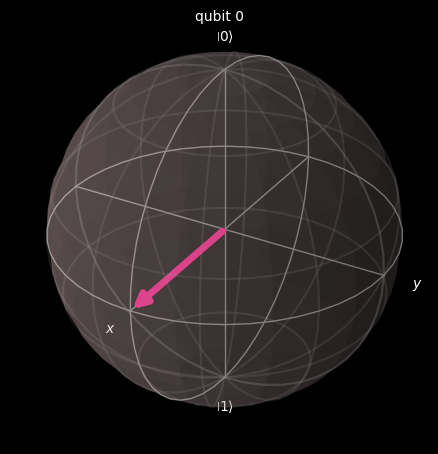

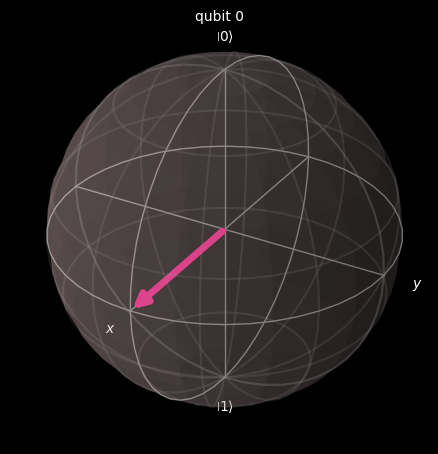

In [21]:
# Visualization
# Convert our array into a Qiskit Statevector object
state = Statevector(v)

# Plotting
plot_bloch_multivector(state)

Modify the example vectors and run your code to create different vectors.

Modify the code below to test different vectors.

Task A: Test the vector [0.6, 0.8]. Is it valid?

Task B: Test a complex state: [0.5, (np.sqrt(3)/2)*1j]. (Remember, in Python imaginary numbersare written as "j").

When you run Task C with [1, 1], you will see a norm of 1.414.

Task C: Test [1, 1]. Observe the error or the visualization.

Testing vector: [0.6 0.8]
Norm result: 1.0000


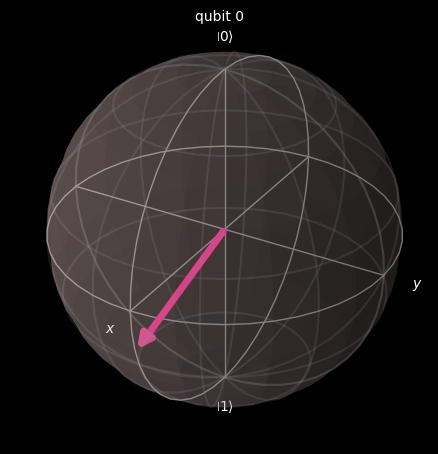

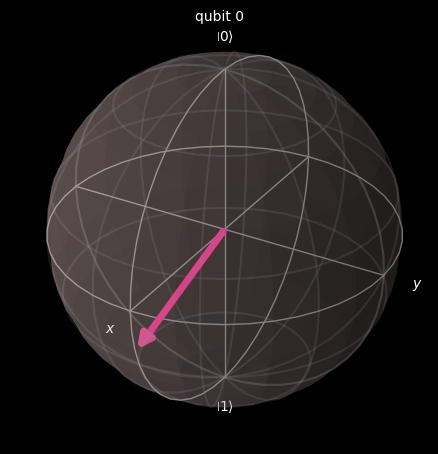

In [22]:

# Edit the line below to test the different vectors mentioned above
my_vector = np.array([0.6, 0.8])

# Calculation Logic
my_norm = np.sqrt(np.vdot(my_vector, my_vector))

print(f"Testing vector: {my_vector}")
print(f"Norm result: {my_norm:.4f}")

# Visualize the result
if np.isclose(my_norm, 1.0):
    display(plot_bloch_multivector(Statevector(my_vector)))
else:
    print("Visualizer skipped: The state is not normalized.")

Hands-On: Visualizing Rotations
We will create a circuit, apply a gate, and see where the vector lands.

State after X-gate:


<IPython.core.display.Latex object>

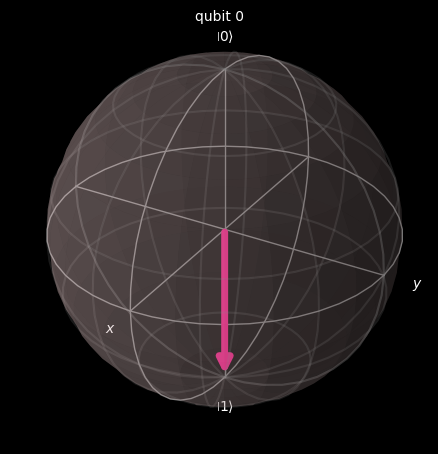

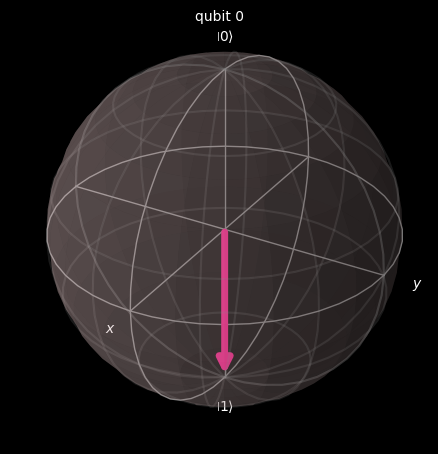

In [23]:
# The X-Gate (NOT Gate)
# 1. Create a circuit with 1 qubit
qc = QuantumCircuit(1)

# 2. Apply the X gate (NOT gate)
qc.x(0)

# 3. Get the statevector
state = Statevector.from_instruction(qc)

print("State after X-gate:")
display(state.draw('latex'))
plot_bloch_multivector(state)

The Hadamard Gate (Creating Superposition)The H-gate is the most important gate in quantum computing. It moves a state from the "North Pole" \ket{0} to the "Equator."

State after H-gate (Superposition):


<IPython.core.display.Latex object>

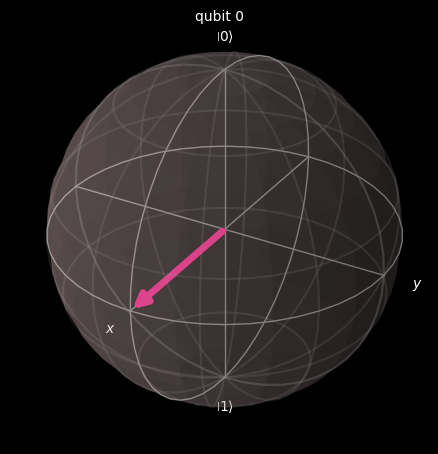

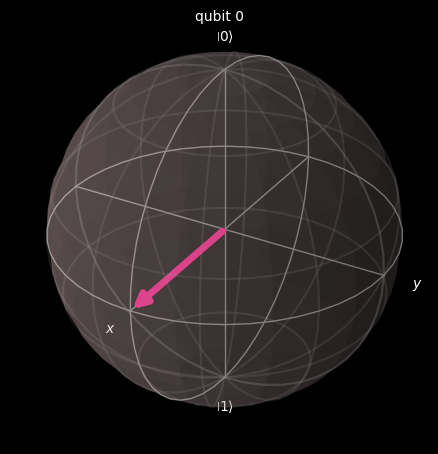

In [24]:
# The Hadamard (H) Gate
qc_h = QuantumCircuit(1)
qc_h.h(0) # Apply Hadamard

state_h = Statevector.from_instruction(qc_h)

print("State after H-gate (Superposition):")
display(state_h.draw('latex'))
plot_bloch_multivector(state_h)

Supplementary: Matrix & Tensor OperationsFor the 6000-level students (and interested 4000-level students), we must understand the underlying linear algebra.A.

**Matrix Multiplication**


Applying a gate to a qubit is mathematically equivalent to multiplying a Matrix by a Vector.$$\ket{\psi_{new}} = G \ket{\psi_{old}}$$

In [25]:
# Matrix, Vector Multiplication
# The X-gate Matrix
X = np.array([[0, 1], [1, 0]])

# The Ket |0>
ket0 = np.array([1, 0])

# Apply X to |0> using np.dot
result = np.dot(X, ket0)

print(f"X-Gate Matrix:\n{X}")
print(f"Result of X|0>: {result} (This is |1>!)")

X-Gate Matrix:
[[0 1]
 [1 0]]
Result of X|0>: [0 1] (This is |1>!)
